# 타이타닉 생존자 예측을 위한 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
# TODO: Pandas 경고는 수정해야 됨
#df["age"] --> select  age from df 
#df["age"].fillna(df["age"].mean(), inplace=True) # age fillna 채울께, 평균으로 이것은 원본 inplace=True이야
#데이터분석에서는 원본데이터는 손대지 않는다.
df["age"].fillna(df["age"].mean())
#df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

## 생존자 현황

In [8]:
survived_count = df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 342명
사망자: 549명
생존율: 38.38%


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


## 1. 성별에 따른 생존율 분석

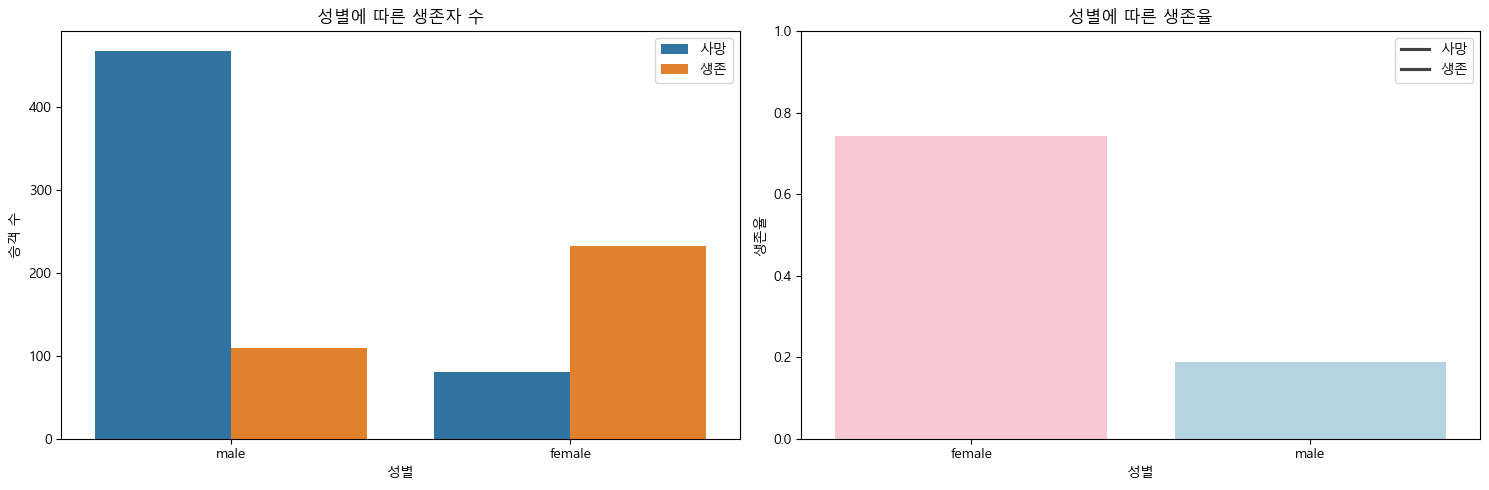

In [10]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
#성별에 따른 생존자 수
sns.countplot(data=df, x='sex', hue="survived", ax=axes[0])
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객 수")
axes[0].legend(labels=["사망", "생존"])

#성별 생존율
sex_survived = df.groupby("sex")["survived"].mean().reset_index()
sns.barplot(data=sex_survived , x="sex", y="survived", ax=axes[1], 
            hue="survived", palette=["lightblue", "pink"])
axes[1].set_title("성별에 따른 생존율")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("생존율")
axes[1].legend(labels=["사망", "생존"])
axes[1].set_ylim(0,1)
#데이터분석은 숫자보가 율이 더 중요하게 본다
plt.tight_layout()
plt.show()

<Axes: xlabel='sex', ylabel='count'>

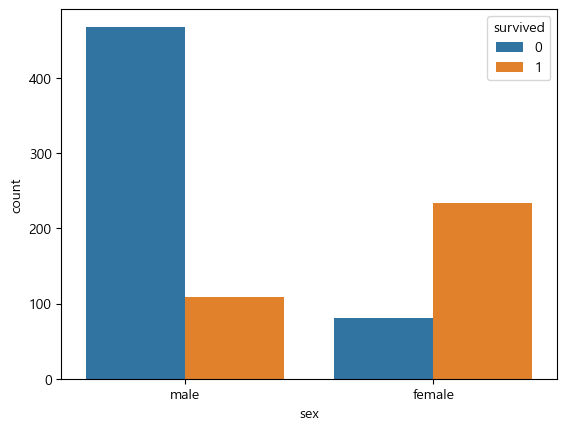

In [11]:
sns.countplot(data=df, x='sex', hue="survived")
#df에서 set 컬럼을 x축에, survived 값을 그룹별로 나눠 막대그래프를 그리겠다는 의미

In [12]:
#판다스 약속: 인덱스는 무조건 x로 설정한다. 
gender_survival_counts = pd.crosstab(df["sex"], df["survived"])
gender_survival_counts

survived,0,1
sex,,
female,81,233
male,468,109


<Axes: xlabel='sex'>

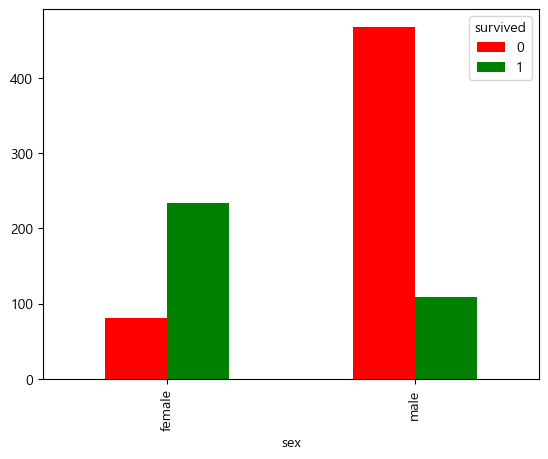

In [13]:
gender_survival_counts = pd.crosstab(df["sex"], df["survived"])
gender_survival_counts.plot(kind="bar", color=["red", "green"])

## 2.승객 등급에 따른 생존율
* 등급별 생존자 수 
* 등급별 생존율
* 등급과 성별 교차표

<Axes: xlabel='sex', ylabel='pclass'>

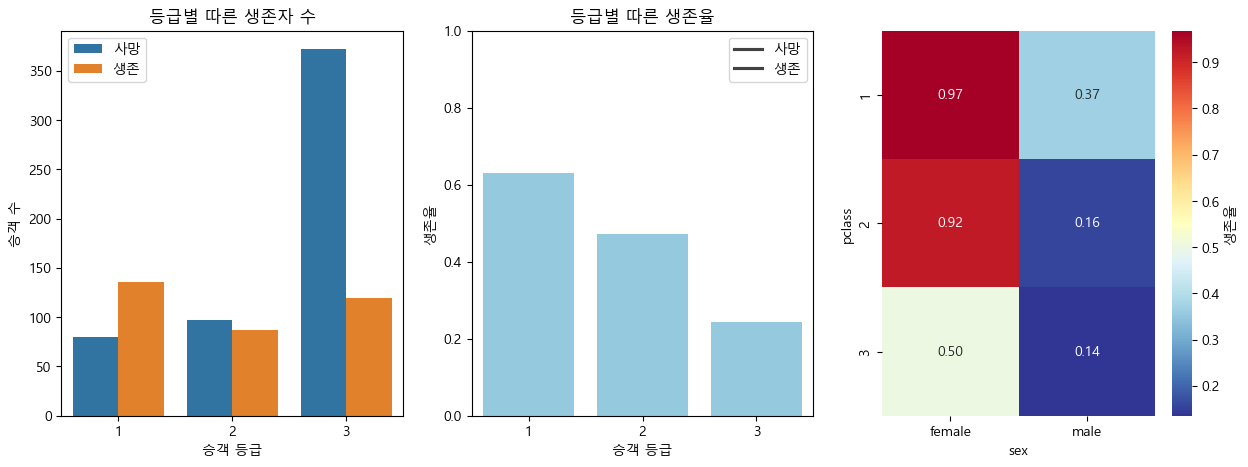

In [14]:
## 승객 등급에 따른 생존율
fig, axes = plt.subplots(1,3, figsize=(15,5))
# 등급별 생존자 수
sns.countplot(data=df, x='pclass', hue="survived", ax=axes[0])
axes[0].set_title("등급별 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객 수")
axes[0].legend(labels=["사망", "생존"])

#등급 생존율 히트맵 groupby crosstab
#히트맵은 거의 사용안함. 색을 설명해야해서
pclass_survived = df.groupby("pclass")["survived"].mean().reset_index()
sns.barplot(data=pclass_survived , x="pclass", y="survived", ax=axes[1], 
           color="skyblue")
axes[1].set_title("등급별 따른 생존율")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("생존율")
axes[1].legend(labels=["사망", "생존"])
axes[1].set_ylim(0,1)

cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")
sns.heatmap(cross_tab, annot=True, fmt=".2f", 
            cmap="RdYlBu_r", cbar_kws={"label":"생존율"},ax=axes[2]) #annot=True 숫자표시됨.


In [15]:
pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")
#pclass 별로 성별을 나눠서 ...의 평균을 구한다.

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## 3.나이에 따른 생존율 분석

* 성별과 나이
전체 나이 분포
그룹별
생존 여부에 따른 나이 분포

In [16]:
df["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

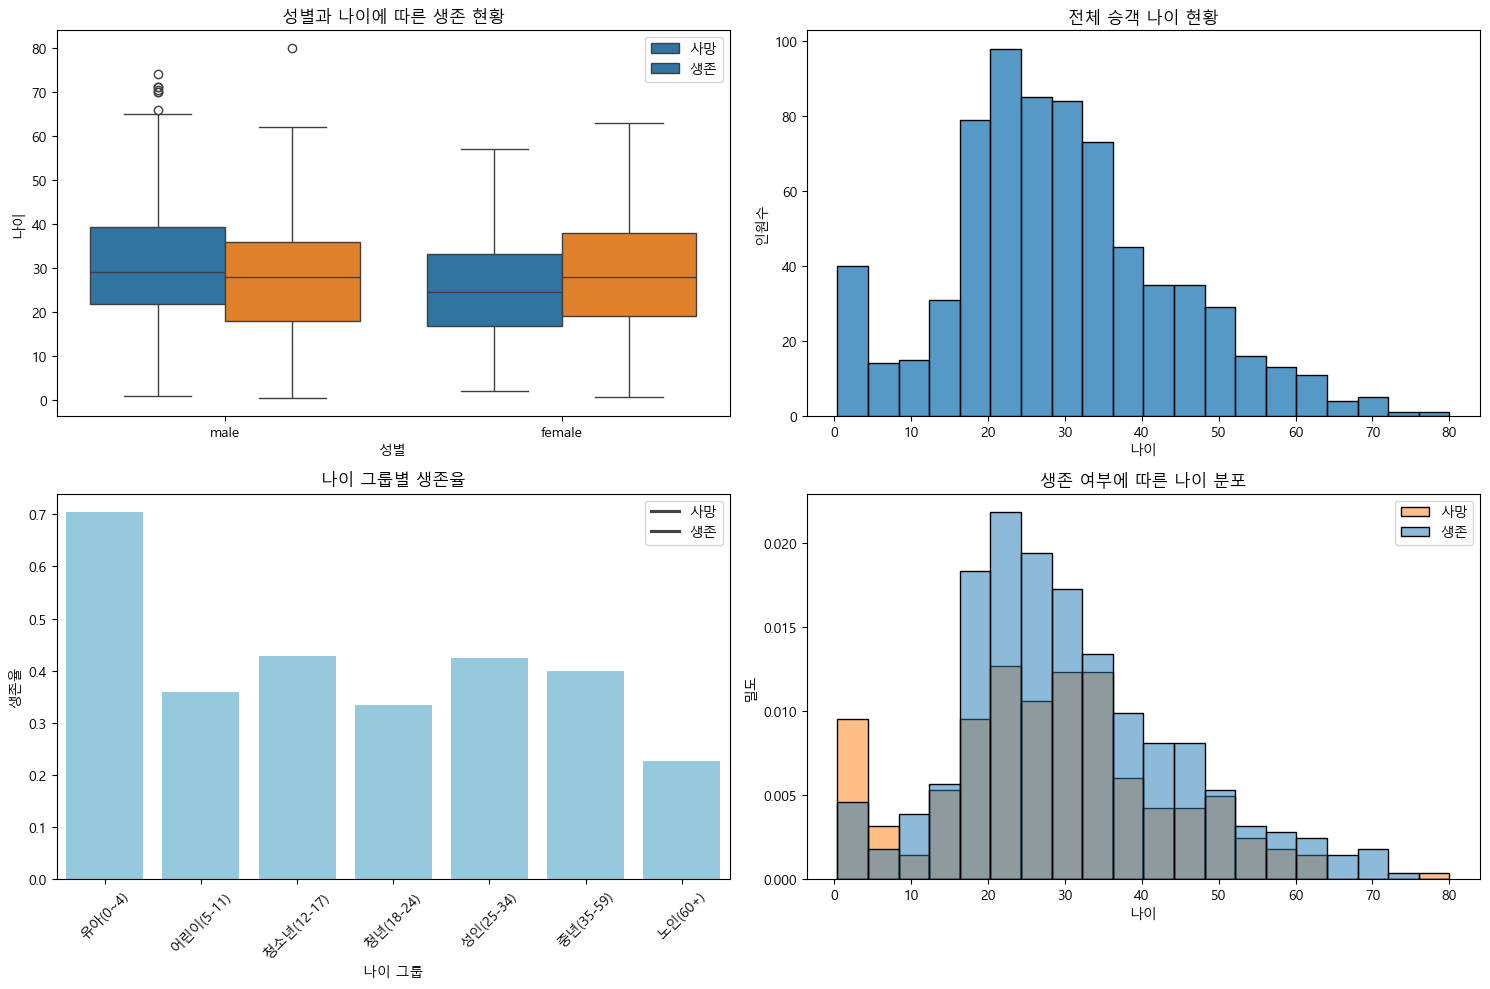

In [17]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df, x="sex", y="age", hue="survived", ax=axes[0,0])
#hue="survived" 생존 여부(예: 0=사망, 1=생존)를 기준으로 색상 분리하여 겹쳐 그림
#ax=axes[0, 0] 2x2 서브플롯 중 첫 번째 위치에 그래프 배치
#서브플롯(캔버스)은 평균 2,2,로 보고, 3,3,은 안하고 차라리 2,3으로 본다. 
axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])
#박스플롯은 일반적으로 통계청에서 사용, 일반분석가는 사용안함.
sns.histplot(data=df, x="age", ax=axes[0,1])
axes[0,1].set_title("전체 승객 나이 현황")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원수")

#데이터분석에서 기준 정의는 내가 정해야 한다(ex.유아는 몇세까지 정의할꺼야?), 그것이 잘못된 결과이면 다시 정의하면 된다.
#유아(0~4)
#어린이(5-11)
#청소년(12-17)
#청년(18-24)
#성인(25-34)
#중년(35-59)
#노인(60+)

bins = [0,5,12,18,25,35,60, np.inf]
labels = [ "유아(0~4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)",
            "성인(25-34)", "중년(35-59)", "노인(60+)"]
df["age_group"] = pd.cut(df["age"], bins, labels=labels) # df["age_group"] 컬럼하나를 추가

age_group_survived = df.groupby("age_group", observed=True)["survived"].mean().reset_index()
sns.barplot(data=age_group_survived , 
            x="age_group", y="survived", ax=axes[1,0], color="skyblue")
axes[1,0].set_title("나이 그룹별 생존율")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("생존율")
axes[1,0].tick_params(axis="x", rotation=45)
axes[1,0].legend(labels=["사망", "생존"])


sns.histplot(data=df, x="age", hue="survived", stat="density", ax=axes[1,1])
axes[1,1].set_title("생존 여부에 따른 나이 분포")
axes[1,1].set_xlabel("나이")
axes[1,1].set_ylabel("밀도")
axes[1,1].legend(labels=["사망", "생존"])

plt.tight_layout()
plt.show()


산업군 : 80 쓸수있다. 85 쓸만하다 90 우수 95 매우 우수 99.9 극소수

#판다스그래프는 plot.히스토, histplot 내가보는것, 시본은 내 동료랑 같이 보는것 

In [18]:
bins = [0,5,12,18,25,35,60, np.inf]
labels = ["유아(0~4)",
"어린이(5-11)",
"청소년(12-17)",
"청년(18-24)",
"성인(25-34)",
"중년(35-59)",
"노인(60+)"]
pd.cut(df["age"], bins, labels=labels)

0      청년(18-24)
1      중년(35-59)
2      성인(25-34)
3      성인(25-34)
4      성인(25-34)
         ...    
886    성인(25-34)
887    청년(18-24)
888          NaN
889    성인(25-34)
890    성인(25-34)
Name: age, Length: 891, dtype: category
Categories (7, object): ['유아(0~4)' < '어린이(5-11)' < '청소년(12-17)' < '청년(18-24)' < '성인(25-34)' < '중년(35-59)' < '노인(60+)']

데이터 - 전처리 EDA - 보고서 (상관계수, 이해) - 이것 - 수학(1.사람 ,2.순서,3.입력 | 예측)

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df, x="sex", y="age", hue="survived", ax=axes[0,0])

axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])

#판다스그래프는 plot.히스토, histplot 내가보는것, 시본은 내 동료랑 같이 보는것 
df["age"].plot()
axes[0,1].set_title("전체 승객 나이 현황")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원수")